In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# Simulation of some data
np.random.seed (245)
nobs =10000

# Definition normalverteilte Features
x1= np.random.normal(size=nobs ,scale=1) # ich definiere normal verteilte x1 
x2= np.random.normal(size=nobs ,scale=1) # auch x2 ist normalverteilt
x3= np.random.normal(size=nobs ,scale=1) # auch x3 ist normalverteilt
x4= np.random.normal(size=nobs ,scale=1) # auch x4 ist normalverteilt
x5= np.random.normal(size=nobs ,scale=1) # auch x5 ist normalverteilt

# Dann werden Features in einer Matrix überführt 
X= np.c_[np.ones((nobs ,1)),x1,x2,x3,x4,x5] 


y= np.cos(x1) + np.sin(x2) + 2*x3 + x4 + 0.01*x5 + np.random.normal(size=nobs , scale=0.01) # fehler ist normalverteilt-> y auch ist normalverteilt
                                                                                            #  width irreducable error ist 0.01
    

# The Neural Network
### Hyper parameters
#### ich habe nicht gleiche Aktivierungsfunktion für alle meiner Neuronen

In [7]:
#Learningrate
LR=0.05


# Number of Neurons
Neuron_Out=1
Neuron_Hidden1=64
Neuron_Hidden2=32

#The Activation function
Activate_output='linear' # für letzte Schicht verwende ich linear
Activate_hidden='relu' # unterschied ist Hidden-Layer-Neuronen werden nicht linear transformiert


#The Optimizer
Optimizer= SGD(lr=LR)


# The loss function
loss='mean_squared_error'

# Splitting Data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size =0.15, random_state =77)


### Construct the Neural Network

In [8]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)
# As in Medium Essa
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#Initialize the ANN
model_ANN= Sequential()

# Hidden Layer-> hier wird Hidden Layer definiert-> Anzahl der Neuronen hier sind 64, 32
# input ist 6 (also 1,x1,x2,x3,x4,x5)-> one is the first column in X Matrix
model_ANN.add(Dense(Neuron_Hidden1, activation=Activate_hidden, input_shape=(6,), use_bias=True))
model_ANN.add(Dense(Neuron_Hidden2, activation=Activate_hidden, use_bias=True))

#Output Layer-> hier wird Output-Layer defniniert
model_ANN.add(Dense(Neuron_Out, activation=Activate_output,use_bias=True))
model_ANN.summary()

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


### Compile the Neural Network

In [9]:
model_ANN.compile(optimizer=Optimizer , loss=loss)

### Fit the Neural Network

In [10]:
#Fit the model
history_ANN=model_ANN.fit(
x_train, # training data
y_train, # training targets
epochs=125)



Epoch 1/125
8500/8500 [==============================] - 2s 208us/step - loss: 0.2328
Epoch 2/125
8500/8500 [==============================] - 1s 80us/step - loss: 0.0477
Epoch 3/125
8500/8500 [==============================] - 1s 78us/step - loss: 0.0372
Epoch 4/125
8500/8500 [==============================] - 1s 90us/step - loss: 0.0216
Epoch 5/125
8500/8500 [==============================] - 1s 75us/step - loss: 0.0171
Epoch 6/125
8500/8500 [==============================] - 1s 71us/step - loss: 0.0186
Epoch 7/125
8500/8500 [==============================] - 1s 98us/step - loss: 0.0149
Epoch 8/125
8500/8500 [==============================] - 1s 78us/step - loss: 0.0118
Epoch 9/125
8500/8500 [==============================] - 1s 76us/step - loss: 0.0104
Epoch 10/125
8500/8500 [==============================] - 1s 88us/step - loss: 0.0108
Epoch 11/125
8500/8500 [==============================] - 1s 77us/step - loss: 0.0087
Epoch 12/125
8500/8500 [==============================] - 1s

8500/8500 [==============================] - 1s 66us/step - loss: 0.0019
Epoch 92/125
8500/8500 [==============================] - 1s 66us/step - loss: 0.0017
Epoch 93/125
8500/8500 [==============================] - 1s 67us/step - loss: 0.0015
Epoch 94/125
8500/8500 [==============================] - 1s 67us/step - loss: 0.0014
Epoch 95/125
8500/8500 [==============================] - 1s 67us/step - loss: 0.0016
Epoch 96/125
8500/8500 [==============================] - 1s 67us/step - loss: 0.0020
Epoch 97/125
8500/8500 [==============================] - 1s 66us/step - loss: 0.0016
Epoch 98/125
8500/8500 [==============================] - 1s 66us/step - loss: 0.0015
Epoch 99/125
8500/8500 [==============================] - 1s 66us/step - loss: 0.0015
Epoch 100/125
8500/8500 [==============================] - 1s 67us/step - loss: 0.0017
Epoch 101/125
8500/8500 [==============================] - 1s 66us/step - loss: 0.0015
Epoch 102/125
8500/8500 [==============================] - 1s 67u

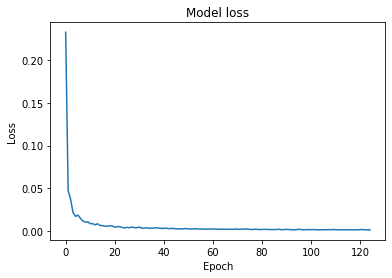

In [11]:
plt.plot(history_ANN.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Evaluation

In [12]:
y_pred_ANN=model_ANN.predict(x_test) 
print("MSE ANN:", mean_squared_error(y_test, y_pred_ANN))

MSE ANN: 0.0008449917503000481


In [13]:
# to better understand
ANN_pred_IS=model_ANN.predict(x_train)
ANN_pred_OOS=model_ANN.predict(x_test)

print(mean_squared_error(y_train, ANN_pred_IS))
print(mean_squared_error(y_test, ANN_pred_OOS))

0.0008747289417145881
0.0008449917503000481


# Find the Jacobian Matrix

In [32]:
def jacobian_tensorflow(x):    
    jacobian_matrix = []
    for m in range(Neuron_Out):
        # We iterate over the M elements of the output vector
        grad_func = tf.gradients(model_ANN.output[:, m], model_ANN.input)
        gradients = sess.run(grad_func, feed_dict={model_ANN.input: x.reshape((1, x.size))})
        jacobian_matrix.append(gradients[0][0,:])
        
    return np.array(jacobian_matrix)

In [33]:
jacobian_tensorflow(x_test)

ValueError: Cannot feed value of shape (1, 9000) for Tensor 'dense_4_input:0', which has shape '(?, 6)'